In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 2: Dimensionality Reduction

[2.1] Reducing the dimensionality of the dataset to two dimensions using a) Autoencoders

In [108]:
df = pd.read_csv('nba_2022-23_stats_cleaned.csv')
df.head()

,Rank,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,2,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,3,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,4,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,5,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

**Data Preprocessing:** Drop non-numeric columns and normalise the data as Autoencoders work best with scaled data.

In [110]:
# Drop non-numeric columns
features = df.drop(columns=['Player Name', 'Team', 'Position'])

# Normalise the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features


array([[-1.72833794,  3.71021079,  1.91346367, ...,  0.08369815,
         1.81580574,  3.56512586],
       [-1.72090423,  3.64248807,  1.44563887, ..., -0.13917807,
         0.04860224, -0.37232779],
       [-1.71347052,  3.61765443,  1.91346367, ..., -0.00545234,
         0.33297981,  0.56923721],
       ...,
       [ 1.71347052, -0.78165715,  0.74390167, ..., -0.76323149,
        -0.41858949, -0.45792461],
       [ 1.72090423, -0.78411844, -0.65957273, ..., -0.58493051,
        -0.11389923, -0.45792461],
       [ 1.72833794, -0.78411844, -0.42566033, ...,  0.79690206,
        -0.94671927, -0.45792461]])

**Build the Autoencoder Model:** Define an Autoencoder with an encoding dimension of 2.

- Explanation of Layer Sizes:
    - The initial layer sizes (32, 16, and 8) allow a gradual reduction, which helps the model learn to compress data effectively without losing too much information.
    - The encoding layer is set to 2 neurons to achieve your goal of reducing the data to two dimensions.
    - This structure allows the model to distill information effectively from the 49 features down to just 2 while minimizing reconstruction loss.

In [111]:
input_dim = scaled_features.shape[1]
print(f'Input dimension: {input_dim}')

encoding_dim = 2 # Target dimension
print(f'Encoding target dimension: {encoding_dim}')

input_layer = Input(shape=(input_dim,))

# Encode layers with progressive reduction in dimensions
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded) # Final 2D encoding

# Decode layers with progressive increase in dimensions back to 49 features
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded) # Output layer for reconstruction

# Define the autoencoder model
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

Input dimension: 49
Encoding target dimension: 2


**Train the Autoencoder:**

In [112]:
autoencoder.fit(scaled_features, scaled_features, epochs=200, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.9918 - val_loss: 2.2615
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0340 - val_loss: 2.2524
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9713 - val_loss: 2.2460
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9362 - val_loss: 2.2402
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9318 - val_loss: 2.2326
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8452 - val_loss: 2.2037
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8520 - val_loss: 2.1195
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7833 - val_loss: 1.8744
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6814 - val_loss: 1.6809
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6492 - val_loss: 1.6054
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6111 - val_loss: 1.5949
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0

**Extract the Encoded (Reduced) Data:** After training, use encoder of model to get reduced data and convert reduced data to new DataFrame for easier handling.

In [113]:
reduced_features = encoder.predict(scaled_features)
print(f'Reduced features: {reduced_features}')

# Convert the reduced features to a DataFrame
reduced_df = pd.DataFrame(reduced_features, columns=[f'feature_{i}' for i in range(encoding_dim)])

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Reduced features: [[2.40963898e+01 8.74981308e+01]
 [1.59876013e+01 3.46798439e+01]
 [1.95081596e+01 4.56304932e+01]
 [1.91388073e+01 7.17038040e+01]
 [1.30454311e+01 6.01761360e+01]
 [2.11478195e+01 5.66989670e+01]
 [1.12604942e+01 4.87053909e+01]
 [2.14332714e+01 6.52793884e+01]
 [5.64879560e+00 6.19609604e+01]
 [2.77972584e+01 9.83401108e+01]
 [2.78958111e+01 6.61026001e+01]
 [2.03348408e+01 6.84763718e+01]
 [6.07245159e+00 0.00000000e+00]
 [1.67603645e+01 3.97010765e+01]
 [1.12988956e-01 3.57958298e+01]
 [4.22057486e+00 4.46222305e+01]
 [6.96489000e+00 2.06638222e+01]
 [2.99177895e+01 2.03879280e+01]
 [3.44464188e+01 9.92075272e+01]
 [2.30870190e+01 6.84110336e+01]
 [1.33649135e+00 1.85531867e+00]
 [1.26925888e+01 5.09405060e+01]
 [0.00000000e+00 1.23104153e+01]
 [1.81394482e+01 5.73493004e+01]
 [9.55983639e+00 3.82624283e+01]
 [2.31513596e+01 7.20194931e+01]
 [1.20465012e+01 2.75053120e+01]
 [3.54190421e+00 6.29839821e+01]
 [2.48269958e+01 6.

**Visualising the Reduced Dataset:** Applying K-Means clustering and plotting the reduced dataset with clusters.

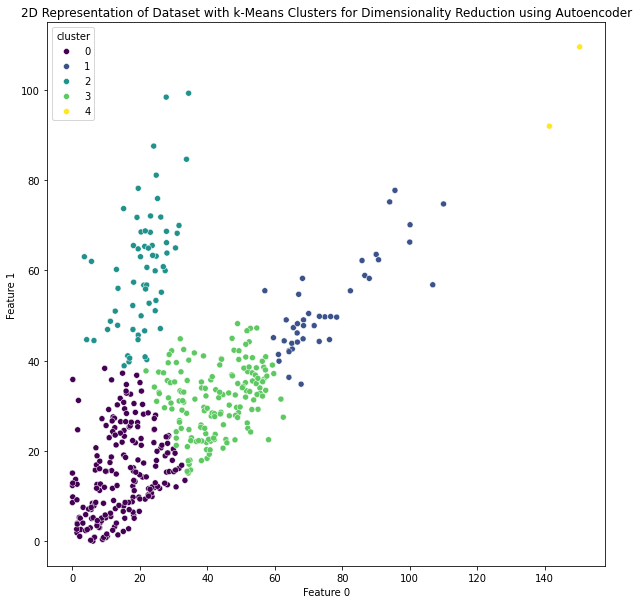

In [114]:
# Apply KMeans clustering to the reduced features
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(reduced_df)

# Add the cluster labels to the  DataFrame
reduced_df['cluster'] = clusters

# Plotting reduced features with cluster labels
plt.figure(figsize=(10, 10))
sns.scatterplot(x='feature_0', y='feature_1', data=reduced_df, hue='cluster', palette='viridis')
plt.title('2D Representation of Dataset with k-Means Clusters for Dimensionality Reduction using Autoencoder')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig("Question 2 Plots/Autoencoder_Clustering_2-1-a.png")
plt.show()